# Spam SMS Detection

## Importing Necessory Libraries

In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Reading Dataset

In [3]:
sms_spam_ds = pd.read_csv("/home/u206160/Codsoft Tasks/4) Spam SMS Detection/spam.csv", encoding='latin1', usecols= ["v1", "v2"])

## Data Preprocessing

In [4]:
sms_spam_ds.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms_spam_ds.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
sms_spam_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
sms_spam_ds.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
sms_spam_ds.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
sms_spam_ds.dtypes

v1    object
v2    object
dtype: object

In [10]:
sms_spam_ds.columns

Index(['v1', 'v2'], dtype='object')

## Data Visualization

### Bar Chart

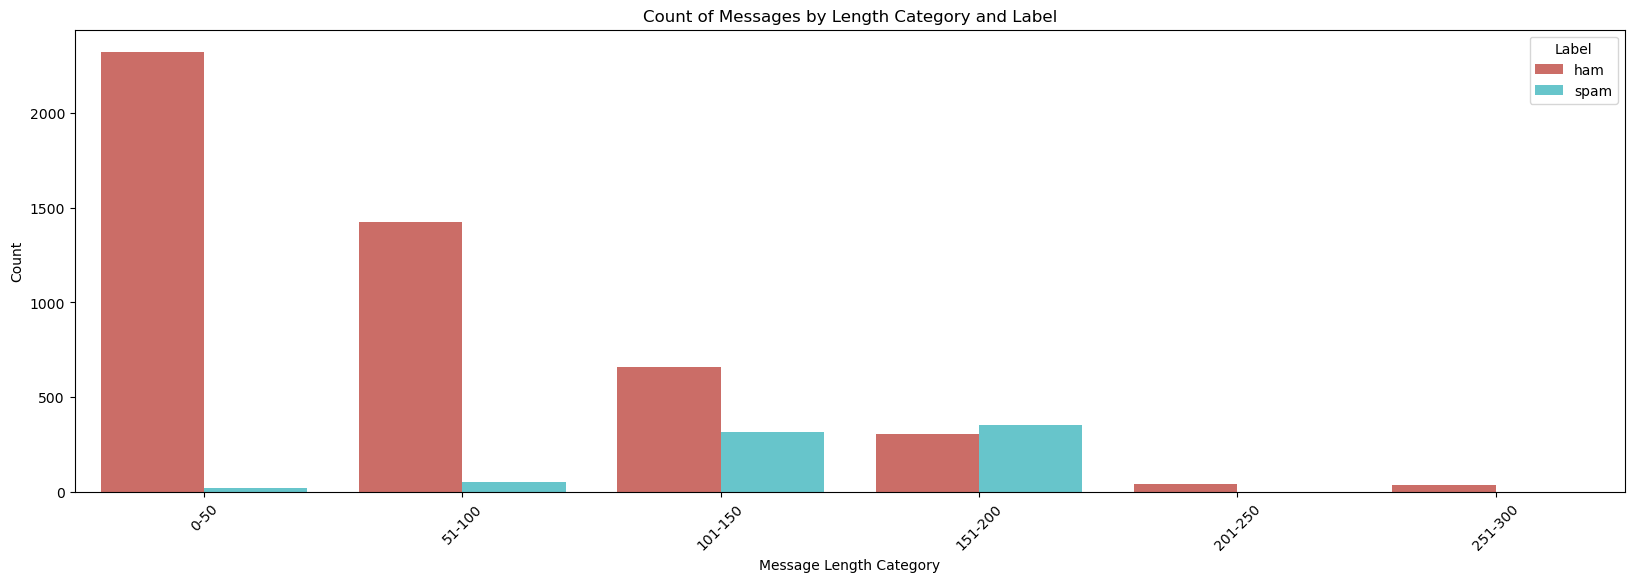

In [12]:
bins = [0, 50, 100, 150, 200, 250, 300] 
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']
sms_spam_ds['length_category'] = pd.cut(sms_spam_ds['v2'].apply(len), bins=bins, labels=labels)
plt.figure(figsize=(20, 6))
sns.countplot(x='length_category', hue='v1', data=sms_spam_ds, palette='hls')
plt.xlabel('Message Length Category')
plt.ylabel('Count')
plt.title('Count of Messages by Length Category and Label')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

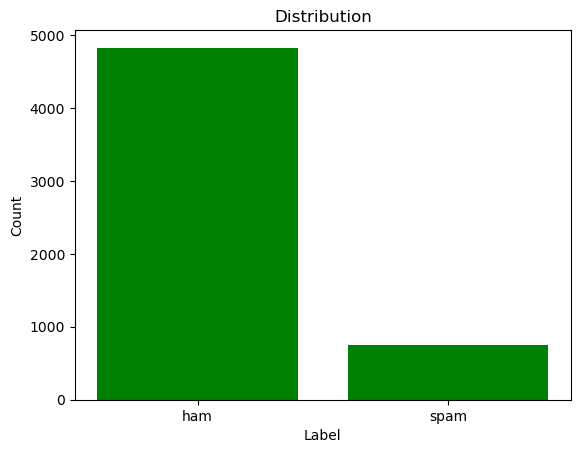

In [13]:
lab_counts = sms_spam_ds['v1'].value_counts()
plt.bar(lab_counts.index, lab_counts.values, color='green')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution')
plt.show()

### Histogram

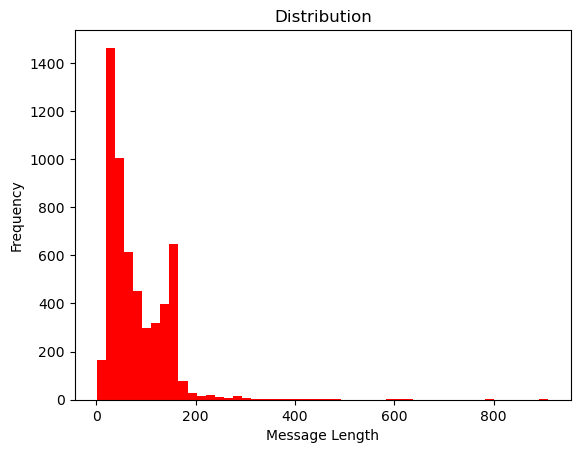

In [14]:
message_len = sms_spam_ds['v2'].apply(len)
plt.hist(message_len, bins=50, color='red')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.show()

###  Word Cloud

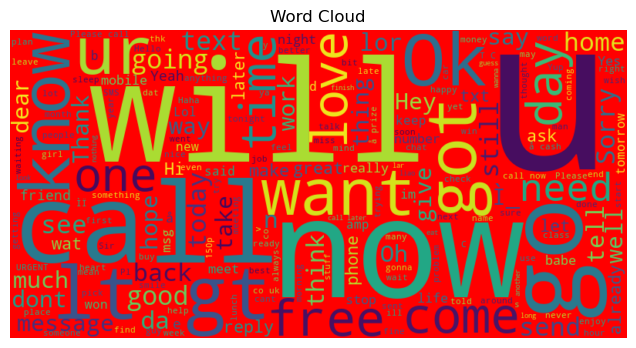

In [15]:
text = ' '.join(sms_spam_ds['v2'])
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(text)
plt.figure(figsize=(20, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

### Pie Chart

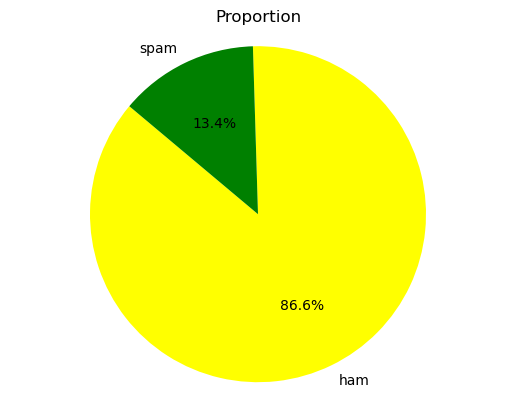

In [16]:
lab_pro = sms_spam_ds['v1'].value_counts(normalize=True)
plt.pie(lab_pro, labels=lab_pro.index, autopct='%1.1f%%', startangle=140,colors=['yellow','green'])
plt.axis('equal')
plt.title('Proportion')
plt.show()

In [17]:
sms_spam_ds['v1'] = sms_spam_ds['v1'].map({'ham': 0, 'spam': 1})

## Test Train Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(sms_spam_ds['v2'], sms_spam_ds['v1'], test_size=0.2, random_state=42)

In [19]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Logistic Regression

In [20]:
lr_mod = LogisticRegression()
lr_mod.fit(X_train_tfidf, y_train)

LogisticRegression()

In [21]:
lr_y_pred = lr_mod.predict(X_test_tfidf)

In [22]:
lr_y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Naive Bayes

In [23]:
nb_mod = MultinomialNB()
nb_mod.fit(X_train_tfidf, y_train)

MultinomialNB()

In [24]:
nb_y_pred = nb_mod.predict(X_test_tfidf)

In [25]:
nb_y_pred

array([0, 0, 1, ..., 0, 0, 1])

## Support Vector Machine

In [26]:
svm_mod = SVC(kernel='linear') 
svm_mod.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [27]:
svm_y_pred = svm_mod.predict(X_test_tfidf)

In [28]:
svm_y_pred

array([0, 0, 1, ..., 0, 0, 1])

## Accuracies

In [29]:
lr_acc = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {lr_acc:.2f}")
print(classification_report(y_test, lr_y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [30]:
nb_acc = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")
print(classification_report(y_test, nb_y_pred))

Naive Bayes Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [31]:
svm_acc = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_acc:.2f}")
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Accuracy Comparision

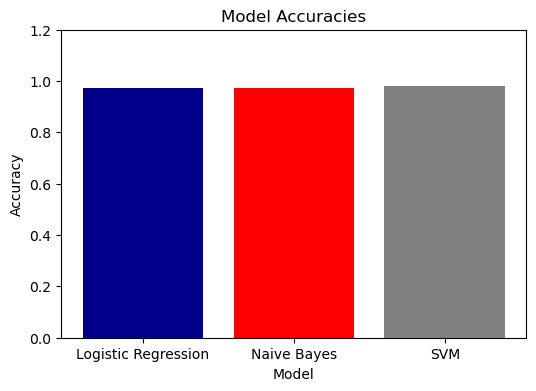

In [32]:
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [lr_acc,nb_acc,svm_acc]
col = ['darkblue', 'red', 'gray'] 
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=col)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1.2)
plt.show()

## Prediction

In [33]:
def pred(message):
    message_tfidf = vectorizer.transform([message])
    prediction = svm_mod.predict(message_tfidf)
    return 'spam' if prediction[0] == 1 else 'ham'

In [34]:
message = input("Enter a SMS message: ")
result = pred(message)
print(f"Message: {message}")
print(f"Predicted Label: {result}")

Enter a SMS message:  Spam Alert


Message: Spam Alert
Predicted Label: ham
